---
# Crash Course Python for Data Science — Predictive Modelling
---
# 01 - Regression modelling
---
#### Lots of models!
- Nearest Neighbors
- Linear Regression
- Polynomial Regression
- "Dummy" Baseline
- Decision Trees

#### Cool features!
- Models with one independent variable
- Models with multiple independent variables
- Encoding ordinal variables from strings to numbers

#### Some evaluation!
- Overfitting vs Underfitting
- Train / Test split
- Mean Absolute Error

#### Less linear algebra!
- None 😂
- Just `sklearn`

# Let's look at diamond data

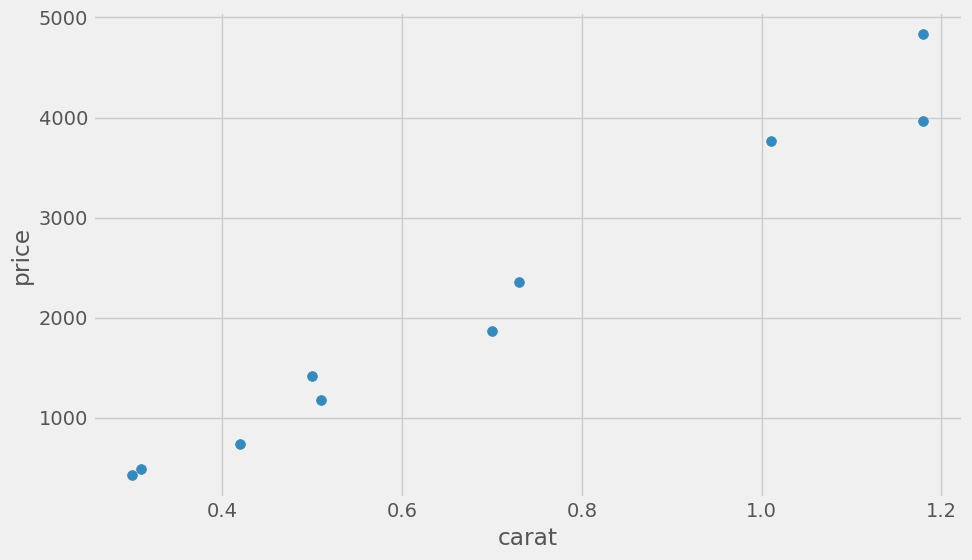

In [1]:
# %matplotlib inline will make your plot outputs appear 
# and be stored within the notebook. It's known as a "magic function"
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# plot tunning
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

columns = ['carat', 'cut', 'price']

# Just 10 data points
data = [[0.3, 'Ideal', 422],
        [0.31, 'Ideal', 489],
        [0.42, 'Premium', 737],
        [0.5, 'Ideal', 1415],
        [0.51, 'Premium', 1177],
        [0.7, 'Fair', 1865],
        [0.73, 'Fair', 2351],
        [1.01, 'Good', 3768],
        [1.18, 'Very Good', 3965],
        [1.18, 'Ideal', 4838]]

train = pd.DataFrame(data=data, columns=columns)

plt.style.use('fivethirtyeight')
train.plot.scatter(x='carat', y='price', s=50);

In [2]:
train

,carat,cut,price
0,0.30,Ideal,422
1,0.31,Ideal,489
2,0.42,Premium,737
3,0.50,Ideal,1415
4,0.51,Premium,1177
5,0.70,Fair,1865
6,0.73,Fair,2351
7,1.01,Good,3768
8,1.18,Very Good,3965
9,1.18,Ideal,4838


# Nearest Neighbors

In [5]:
features = ['carat']
target = 'price'

from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=2)

model.fit(train[features], train[target])

KNeighborsRegressor(n_neighbors=2)

Predict price of 0.7 carat diamond

In [6]:
model.predict([[0.7]])

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([2108.])

Predict price of 0.9 carat diamond

In [7]:
model.predict([[0.9]])

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([3059.5])

Predict price of 1.2 carat diamond

In [8]:
model.predict([[1.2]])

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([4401.5])

We can get multiple predictions at the same time

In [9]:
model.predict([[0.7], [0.9], [1.2]])

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([2108. , 3059.5, 4401.5])

We can get predictions for each 1/100 carat, from 0 to 1.3 carats

In [10]:
# [[0.0], [0.01], [0.02], ... [1.28], [1.29]]
carats = [[c/100] for c in range(130)]
predictions = model.predict(carats)

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Plot these predictions

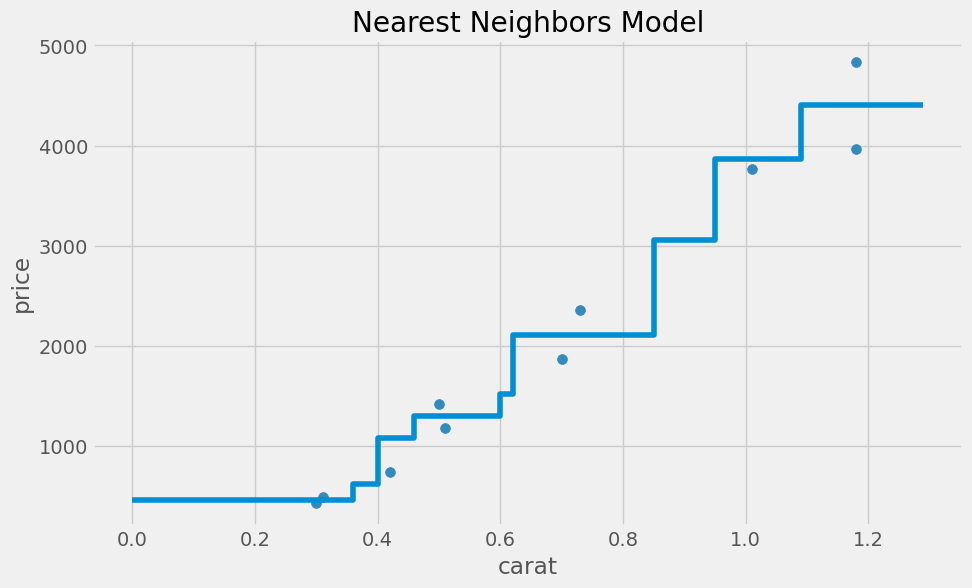

In [11]:
train.plot.scatter(x='carat', y='price', s=50)
plt.step(carats, predictions)
plt.title('Nearest Neighbors Model');

# Linear Regression

For a Linear Regression, the first two lines of code are different, but the rest of the cell is the same.

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


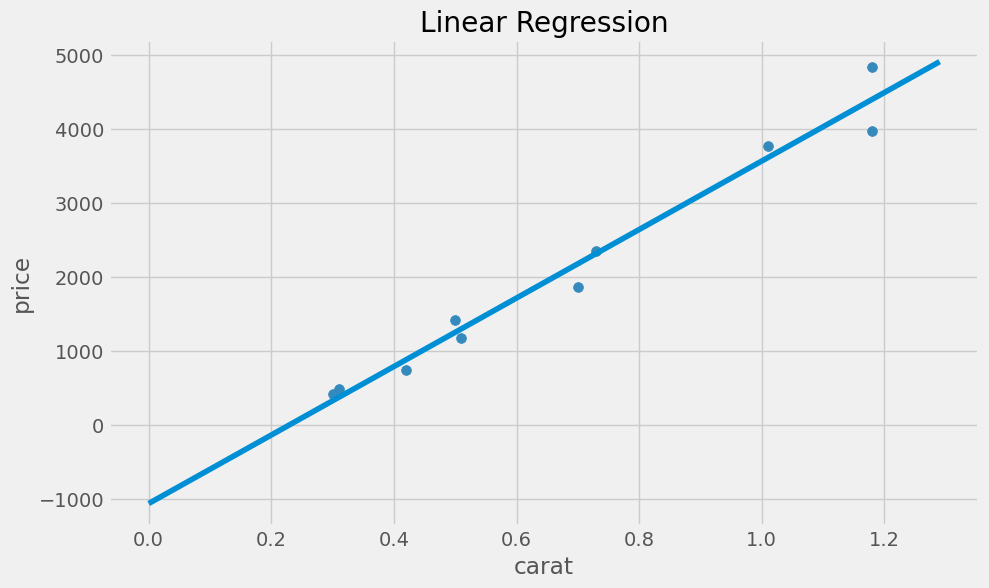

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(train[features], train[target])
predictions = model.predict(carats)
train.plot.scatter(x='carat', y='price', s=50)
plt.plot(carats, predictions)
plt.title('Linear Regression');

We can get the equation for the line:

In [13]:
model.coef_, model.intercept_

(array([4626.92985203]), -1062.1200187896338)

$$ y = mx + b $$

$$ price = 4,627*carat - 1,062 $$

# Polynomial Regression

Let's try another model. Again, the first few lines of code are different, but the rest of the cell is the same.

This model is more flexible — *too* flexible. It "overfits."

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


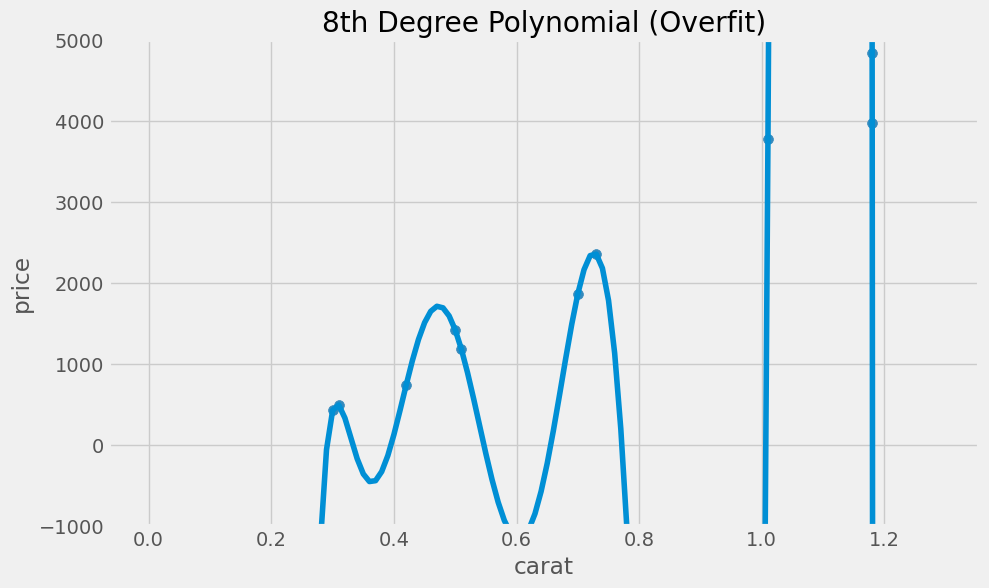

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
model = make_pipeline(PolynomialFeatures(degree=8), LinearRegression())

model.fit(train[features], train[target])
predictions = model.predict(carats)
train.plot.scatter(x='carat', y='price', s=50)
plt.plot(carats, predictions)
plt.title('8th Degree Polynomial (Overfit)')
plt.ylim((-1000, 5000));

This model fits the training data almost perfectly, but doesn't generalize to new data, so some predictions are absurd:

In [15]:
model.predict([[0.9]])

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([-32870.77441626])

If you're curious, here are the polynomial coefficients. The model is overly complex.

In [16]:
# Don't worry about understanding this code
print('Intercept', model.named_steps['linearregression'].intercept_.astype(int))
print(pd.Series(model.named_steps['linearregression'].coef_.astype(int), 
                model.named_steps['polynomialfeatures'].get_feature_names('c')))

Intercept -7166492
1               0
c       110806306
c^2    -726566753
c^3   -2147483648
c^4   -2147483648
c^5   -2147483648
c^6   -2147483648
c^7   -2147483648
c^8    -569338230
dtype: int32


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# "Dummy" Baseline

This model has the opposite problem — it "underfits."

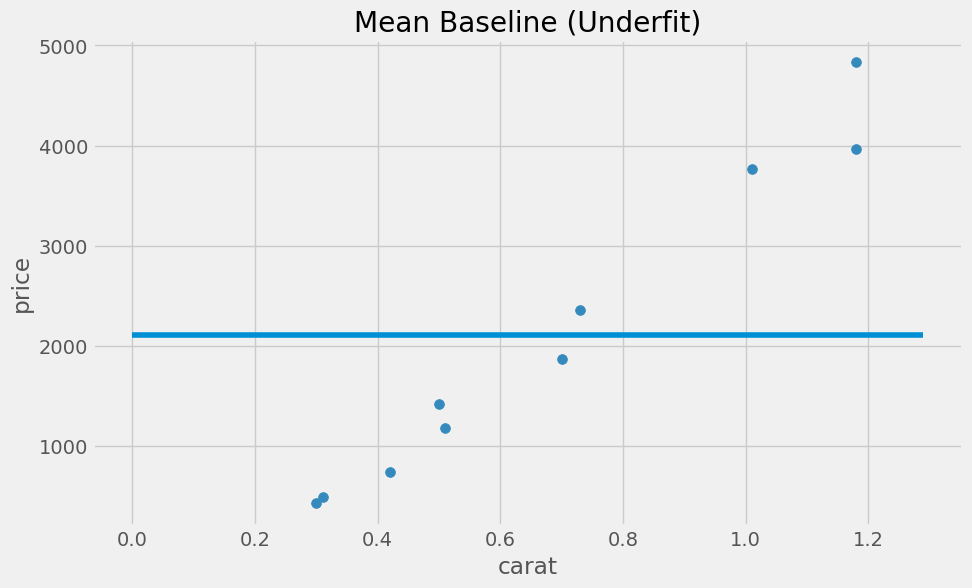

In [17]:
from sklearn.dummy import DummyRegressor
model = DummyRegressor(strategy='mean')

model.fit(train[features], train[target])
predictions = model.predict(carats)
train.plot.scatter(x='carat', y='price', s=50)
plt.plot(carats, predictions)
plt.title('Mean Baseline (Underfit)');

# Test data

With so many options, how do we choose the best model?

To avoid overfitting, use different data for training and testing.

In [18]:
data = [[0.3, 'Ideal', 432],
        [0.34, 'Ideal', 687],
        [0.37, 'Premium', 1124],
        [0.4, 'Good', 720],
        [0.51, 'Ideal', 1397],
        [0.51, 'Very Good', 1284],
        [0.59, 'Ideal', 1437],
        [0.7, 'Ideal', 3419],
        [0.9, 'Premium', 3484],
        [0.9, 'Fair', 2964]]

test = pd.DataFrame(data=data, columns=columns)

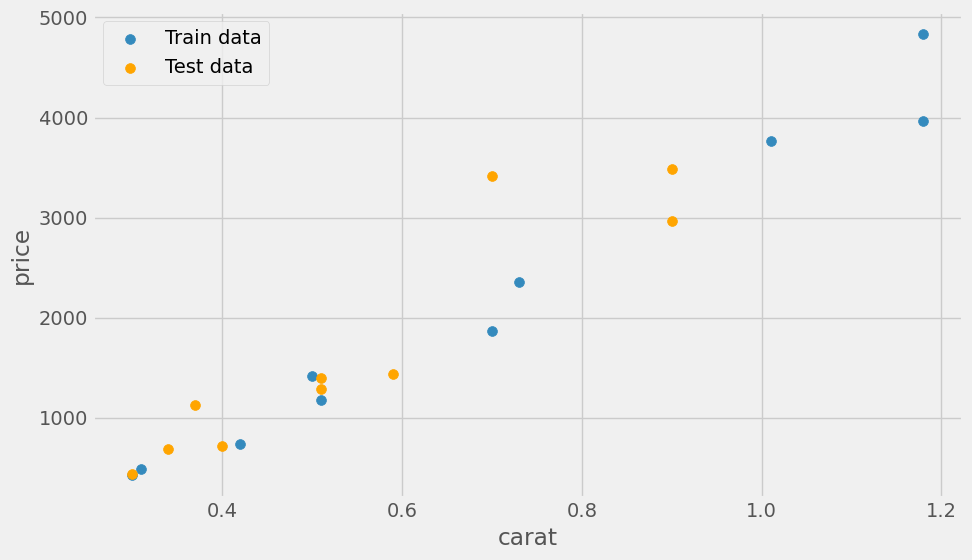

In [19]:
ax = train.plot.scatter(x='carat', y='price', s=50)
test.plot.scatter(x='carat', y='price', s=50, color='orange', ax=ax)
plt.legend(['Train data', 'Test data']);

# Compare four models

How well does each model fit the training data? The test data?

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


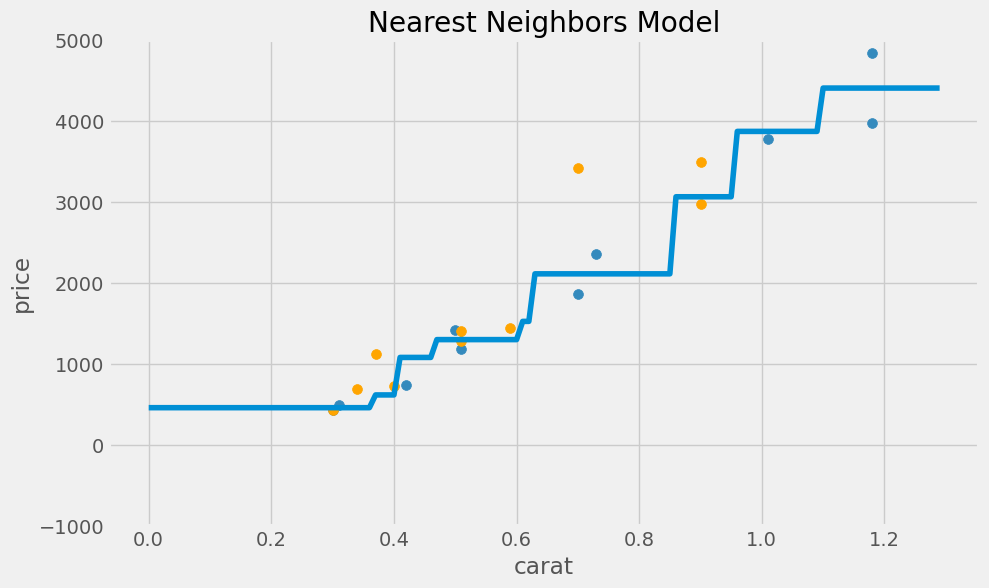

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Train Error: $ 210
Test Error: $ 296 



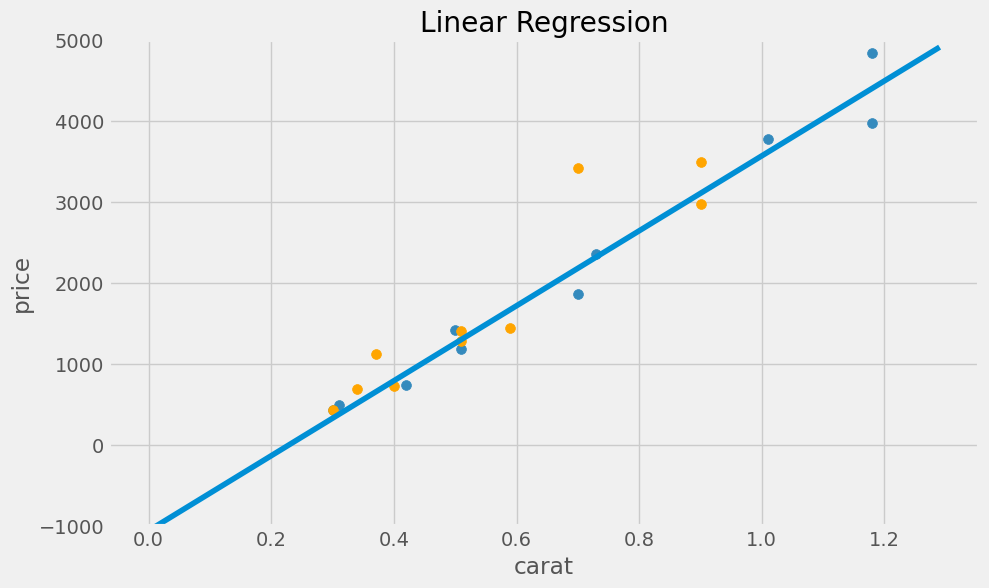

Train Error: $ 202
Test Error: $ 293 



D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


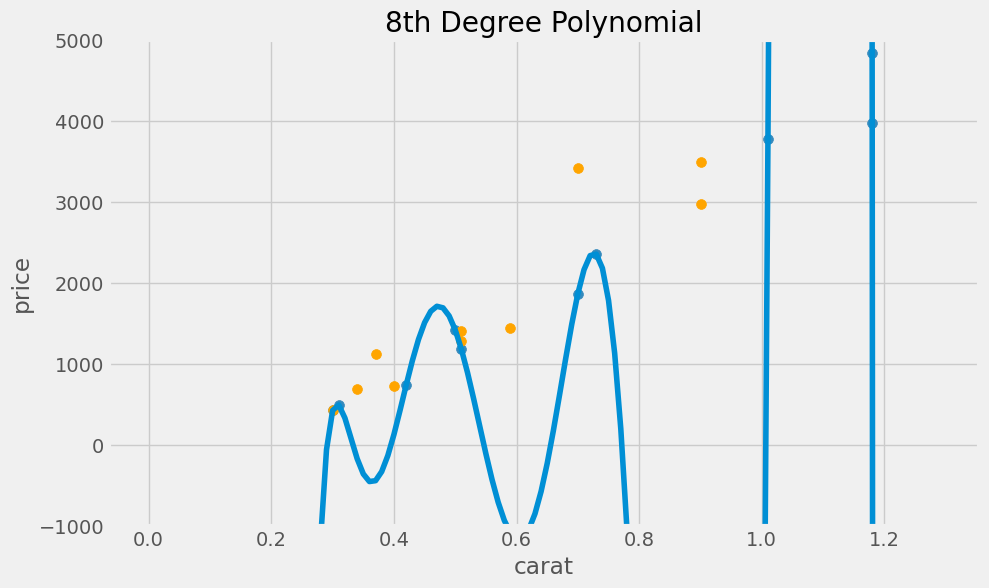

Train Error: $ 87
Test Error: $ 7963 



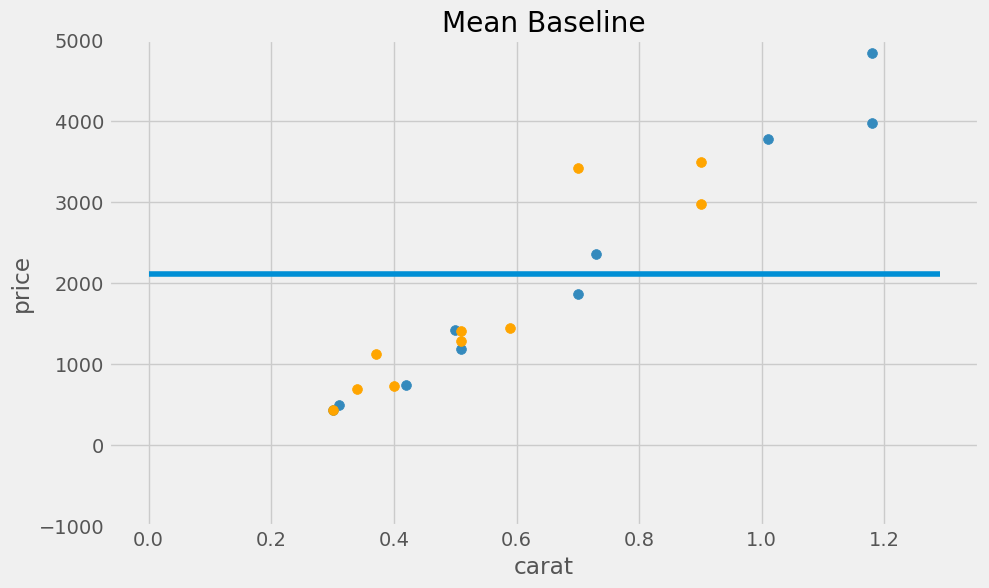

Train Error: $ 1302
Test Error: $ 1120 



In [20]:
# Use mean absolute error to compare models
from sklearn.metrics import mean_absolute_error

# Compare four models
models = [('Nearest Neighbors Model', KNeighborsRegressor(n_neighbors=2)),
          ('Linear Regression', LinearRegression()),
          ('8th Degree Polynomial', make_pipeline(PolynomialFeatures(degree=8), LinearRegression())),
          ('Mean Baseline', DummyRegressor(strategy='mean'))]

for name, model in models:
    
    # Plot training data (blue dots)
    ax = train.plot.scatter(x='carat', y='price', s=50)
    
    # Plot testing data (orange dots)
    test.plot.scatter(x='carat', y='price', s=50, color='orange', ax=ax)
    
    # Train model
    model.fit(train[features], train[target])
    
    # Plot predictions (blue line)
    plt.plot(carats, model.predict(carats))
    plt.title(name)
    plt.ylim((-1000, 5000))
    plt.show()
    
    # Calculate mean absolute error on the training data
    # (average distance between line and blue dots)
    y_true = train[target]
    y_pred = model.predict(train[features])
    train_error = mean_absolute_error(y_true, y_pred)
    
    # Calculate mean absolute error on the test data
    # (average distance between line and orange dots)
    y_true = test[target]
    y_pred = model.predict(test[features])
    test_error = mean_absolute_error(y_true, y_pred)
    
    # Display the errors
    print('Train Error: $', round(train_error))
    print('Test Error: $', round(test_error), '\n')

# Mean absolute error

The first step is to calculate the difference between predicted values and true values. 

In [21]:
# Error for Baseline Model
predicted = train.price.mean()
true = train.price
(predicted - true)

0    1680.7
1    1613.7
2    1365.7
3     687.7
4     925.7
5     237.7
6    -248.3
7   -1665.3
8   -1862.3
9   -2735.3
Name: price, dtype: float64

Then take the absolute value

In [22]:
# Absolute Error for Baseline Model
(predicted - true).abs()

0    1680.7
1    1613.7
2    1365.7
3     687.7
4     925.7
5     237.7
6     248.3
7    1665.3
8    1862.3
9    2735.3
Name: price, dtype: float64

And then the mean.

In [23]:
# Mean Absolute Error for Baseline Model
(predicted - true).abs().mean()

1302.2399999999998

What if we just calculated "Mean Error", instead of "Mean *Absolute* Error"?

In [24]:
(predicted - true).mean()

-1.8189894035458566e-13

Positive and negative errors could zero each other out!

In [0]:
-0.00000000000018

This is why we do not use "Mean Error." Instead, we use metrics like "Mean Absolute Error" or "Mean Squared Error."

# More features

The models so far have only used one feature, `carat`. What about `cut`?

In [0]:
train

If we try to use `cut` as-is, we get an error:

In [25]:
features = ['carat', 'cut']
target = 'price'
model = LinearRegression()
model.fit(train[features], train[target])

ValueError: could not convert string to float: 'Ideal'

Because `cut` is a string, not a number

In [26]:
train

,carat,cut,price
0,0.30,Ideal,422
1,0.31,Ideal,489
2,0.42,Premium,737
3,0.50,Ideal,1415
4,0.51,Premium,1177
5,0.70,Fair,1865
6,0.73,Fair,2351
7,1.01,Good,3768
8,1.18,Very Good,3965
9,1.18,Ideal,4838


# Encode ordinal variable, from strings to numbers

We can encode `cut` as a number instead of a string

In [27]:
cut_ranks = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
train.cut = train.cut.map(cut_ranks)
test.cut = test.cut.map(cut_ranks)
train

,carat,cut,price
0,0.30,5,422
1,0.31,5,489
2,0.42,4,737
3,0.50,5,1415
4,0.51,4,1177
5,0.70,1,1865
6,0.73,1,2351
7,1.01,2,3768
8,1.18,3,3965
9,1.18,5,4838


Now we can use `cut`.

# Decision Tree

Let's try a new model type with our new feature.

In [28]:
# Choose features and target
features = ['carat', 'cut']
target = 'price'

# Fit model
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='mae')
model.fit(train[features], train[target])

D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mae')

In [29]:
def error():
    # Calculate mean absolute error on the training data
    y_true = train[target]
    y_pred = model.predict(train[features])
    train_error = mean_absolute_error(y_true, y_pred)

    # Calculate mean absolute error on the test data
    y_true = test[target]
    y_pred = model.predict(test[features])
    test_error = mean_absolute_error(y_true, y_pred)

    # Display the errors
    print('Train Error: $', round(train_error))
    print('Test Error: $', round(test_error))
    
error()

Train Error: $ 0
Test Error: $ 473


The train error is zero! This model overfits.

# Visualize the tree

Let's look at the tree to try to understand it better.

#### To install Graphviz:
- On Google Colab, run the cell below.
- On your local machine, I recommend you use [Anaconda](https://www.anaconda.com/download/) instead: `conda install python-graphviz`

In [33]:
!pip install graphviz
!apt-get install graphviz

'apt-get' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [34]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model, out_file=None, feature_names=features, filled=True, rotate=True)
graphviz.Source(dot_data)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [32]:
train

,carat,cut,price
0,0.30,5,422
1,0.31,5,489
2,0.42,4,737
3,0.50,5,1415
4,0.51,4,1177
5,0.70,1,1865
6,0.73,1,2351
7,1.01,2,3768
8,1.18,3,3965
9,1.18,5,4838


# Prune the tree

We can use the `min_samples_leaf` parameter to "prune" the tree and try to reduce overfitting.

In [35]:
model = DecisionTreeRegressor(criterion='mae', min_samples_leaf=2)
model.fit(train[features], train[target])
error()

Train Error: $ 211
Test Error: $ 498


D:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


The tree is pruned, but the test error is even worse. 10 data points is probably not enough for this type of model.

In [36]:
dot_data = export_graphviz(model, out_file=None, feature_names=features, filled=True, rotate=True)
graphviz.Source(dot_data)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

# Multiple Regression

Let's return to linear regression, our best model so far. This time, we'll use both features, to do a multiple regression.

In [37]:
model = LinearRegression()
model.fit(train[features], train[target])
error()

Train Error: $ 171
Test Error: $ 257


This is our lowest test error so far. Here's the equation:

In [38]:
model.coef_, model.intercept_

(array([4770.55908807,   82.45286436]), -1448.947441495462)

$$ price = 4,771*carat + 82*cut - 1,449 $$

### Predict the price of a 0.9 carat diamond with "Very Good" (3) cut 

Using the formula:

In [0]:
4771 * 0.9 + 82 * 3 - 1449

The model's predict method gives the same result, as expected:

In [39]:
model.predict([[0.9, 3]])

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3091.91433084])

There's no comparable diamond in the training data ...

In [40]:
train

,carat,cut,price
0,0.30,5,422
1,0.31,5,489
2,0.42,4,737
3,0.50,5,1415
4,0.51,4,1177
5,0.70,1,1865
6,0.73,1,2351
7,1.01,2,3768
8,1.18,3,3965
9,1.18,5,4838


... but, the test data has two 0.9 carat diamonds. One has a better cut and a higher price. The other has a worse cut and a lower price. So the prediction looks plausible!

In [41]:
test

,carat,cut,price
0,0.30,5,432
1,0.34,5,687
2,0.37,4,1124
3,0.40,2,720
4,0.51,5,1397
5,0.51,3,1284
6,0.59,5,1437
7,0.70,5,3419
8,0.90,4,3484
9,0.90,1,2964


# Could we figure out this formula, just by looking at the numbers?

For the simple regression, sure. It's just twenty numbers. Plot the data and draw a line.

But add just one more dimension, and it gets harder, even though it's still just thirty numbers.

In [42]:
train.shape

(10, 3)

And these thirty numbers come from a *much* bigger [dataset](https://ggplot2.tidyverse.org/reference/diamonds.html) — which you'll use for your exercise!

In [43]:
import seaborn as sns
sns.load_dataset('diamonds').shape

(53940, 10)

I wouldn't want to look at a half million numbers to search for patterns by hand. 

There's a fascinating story about [how a Russian mathematician constructed a decision tree - by hand - to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/).

But I'm glad we have computers!

# Recap, with references

### Google glossary

#### [machine learning](https://developers.google.com/machine-learning/glossary/#machine_learning)
> A program or system that **builds (trains) a predictive model from input data**. The system uses the learned model **to make useful predictions from new (never-before-seen) data drawn from the same distribution** as the one used to train the model. Machine learning also refers to the field of study concerned with these programs or systems.

#### [supervised machine learning](https://developers.google.com/machine-learning/glossary/#supervised_machine_learning)
> Training a model from input data and its corresponding labels. **Supervised machine learning is analogous to a student learning a subject by studying a set of questions and their corresponding answers.** After mastering the mapping between questions and answers, the student can then provide answers to new (never-before-seen) questions on the same topic. Compare with unsupervised machine learning.

#### [example](https://developers.google.com/machine-learning/glossary/#example)
> One row of a data set. **An example contains one or more features and** possibly **a label.** See also labeled example and unlabeled example.


#### [label](https://developers.google.com/machine-learning/glossary/#label)
> In supervised learning, the "answer" or "result" portion of an example. Each example in a labeled data set consists of one or more features and a label. **For instance, in a housing data set, the features might include the number of bedrooms, the number of bathrooms, and the age of the house, while the label might be the house's price.** In a spam detection dataset, the features might include the subject line, the sender, and the email message itself, while the label would probably be either "spam" or "not spam."

#### [target](https://developers.google.com/machine-learning/glossary/#target)
> Synonym for label.

#### [regression model](https://developers.google.com/machine-learning/glossary/#regression_model)
> A type of model that outputs **continuous** (typically, floating-point) values. Compare with classification models, which output discrete values, such as "day lily" or "tiger lily."

### Wikipedia

[**Machine learning**](https://en.wikipedia.org/wiki/Machine_learning) is a field of computer science that uses statistical techniques to **give computer systems the ability to "learn"** (e.g., progressively improve performance on a specific task) **with data, without being explicitly programmed.**

The name machine learning was coined in 1959 by Arthur Samuel. Evolved from the study of **pattern recognition** and computational learning theory in **artificial intelligence**... Machine learning is employed in a range of computing tasks **where designing and programming explicit algorithms with good performance is difficult or infeasible**; example applications include email filtering, detection of network intruders, and computer vision.

Machine learning is **closely related to (and often overlaps with) computational statistics**, which also focuses on prediction-making through the use of computers. It has strong ties to mathematical optimization ... 

Within the field of data analytics, machine learning is a method used to devise complex models and algorithms that lend themselves to prediction; in commercial use, this is known as predictive analytics. These analytical models allow researchers, data scientists, engineers, and analysts to **"produce reliable, repeatable decisions and results"** and **uncover "hidden insights"** through learning from historical relationships and trends in the data.

**Supervised learning:** The computer is presented with example inputs and their desired outputs, given by a "teacher", and the goal is to learn a general rule that **maps inputs to outputs.**

In **regression**, a supervised problem, the **outputs are continuous** rather than discrete.

### Scikit-learn documentation
- [Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html)
- [Linear Regression](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)
- [Polynomial Regression](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)
- ["Dummy" Regressor / Mean Baseline](http://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators)
- [Decision Trees](http://scikit-learn.org/stable/modules/tree.html)

### Free, practical books
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/), Chapter 5, by Jake VanderPlas
- [The Mechanics of Machine Learning](https://mlbook.explained.ai/), by Terence Parr & Jeremy Howard